In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
from os.path import join, isfile
from os import listdir
from functools import partial

import glam as gb

%load_ext autoreload
%autoreload 2

# Example 3: Parameter recovery

When performing model-based analyses of behaviour that include the interpretation of parameter estimates, or comparisons of parameter estimates between groups or conditions, the researcher should be confident that the model’s parameters are actually identifiable. In particular, the researcher needs to be confident, that the set of estimated parameters unambiguously describes the observed data better than any other set of parameters. A straightforward way of testing this is to perform a parameter recovery: The general intuition of a parameter recovery analysis is to first generate a synthetic data set from a model using a set of known parameters, and then fitting the model to the synthetic data. Finally, the estimated parameters can be compared to the known generating parameters. If they match to a satisfying degree, the parameters were recovered successfully. Previous analyses have already indicated that the GLAM’s parameters can generally be recovered to a satisfying degree (see Thomas et al., 2019). Yet, the ability to identify a specific set of parameters always depends on the specific features of a given dataset. The most obvious feature of a data set that influences recoverability of model parameters is the number of data points included. Usually this quantity refers to the number of trials. For hierarchical models, the precision of group level estimates also depends on the number of individuals per group. Additional features that vary between datasets and that could influence parameter estimation are the observed distribution of gaze, the distribution of item values or the number of items in each trial. For this reason, it should always be tested whether the estimated parameters of a model can be recovered in the context of a specific dataset.

In [2]:
# Simulate a pretend-to-be-collected dataset.
# In the real world, this dataset is collected from participants, so we do not know
# 1) if GLAM is an adequate model for the data
# 2) data-generating parameters

data_model = gb.GLAM()

parameters = dict(v=dict(mu=0.000075, sd=0.000025, bounds=(0.00002, 0.0002)),
                  gamma=dict(mu=0.1, sd=0.3, bounds=(-1, 1)),
                  s=dict(mu=0.008, sd=0.001, bounds=(0.005, 0.015)),
                  tau=dict(mu=0.8, sd=0.1, bounds=(0.1, 2)))

data_model.simulate_group(kind='hierarchical',
                          n_individuals=50,
                          n_trials=200,
                          n_items=4,
                          parameters=parameters,
                          value_range=(1, 10),
                          seed=1)

data = data_model.data

## Example Recovery

To demonstrate the procedure of a basic parameter recovery analysis using GLAMbox, suppose we have collected and loaded a data set called data. In the first step, we perform basic parameter estimation as in the previous examples:

In [3]:
glam = gb.GLAM(data=data)
glam.make_model(kind='individual')
glam.fit(method='MCMC', draws=5000, tune=5000, chains=4)

Generating single subject models for 50 subjects...


/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

Fitting 50 model(s) using MCMC...
  Fitting model 1 of 50...


/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

  Fitting model 2 of 50...


/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1396.09draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 3 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1393.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 4 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1397.08draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 5 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1059.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 6 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1396.47draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 7 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1394.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 8 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1395.09draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 9 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1387.34draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 10 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1394.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 11 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.83draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 12 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.60draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 13 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1393.03draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 14 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.92draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 15 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 16 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.71draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 17 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1396.05draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 18 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.31draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 19 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 20 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1384.31draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 21 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1391.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 22 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.71draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 23 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.02draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 24 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.27draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 25 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 26 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1391.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 27 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.53draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 28 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1387.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 29 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.30draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 30 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.92draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 31 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.38draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 32 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1390.53draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 33 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.75draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 34 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1384.23draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 35 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1387.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 36 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.10draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 37 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.91draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 38 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.11draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 39 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.59draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 40 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.77draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 41 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.08draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 42 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.97draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 43 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1384.86draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 44 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.26draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 45 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.79draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 46 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1389.47draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 47 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.97draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 48 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1378.03draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 49 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.96draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 50 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1384.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


/!\ Automatically setting parameter precision...


The next step is to create a synthetic, model-generated data set using the model parameters estimated from the empirical data, together with the empirically observed stimulus and gaze data. Setting`n_repeats` to 1 results in a data set of the same size as the observed one:

In [4]:
glam.predict(n_repeats=1)
synthetic = glam.prediction

  0%|          | 8/10000 [00:00<02:10, 76.57it/s]

Generating predictions for 10000 trials (1 repeats each)...


100%|██████████| 10000/10000 [02:09<00:00, 77.20it/s]


This data set should resemble the empirically observed data closely. Next, we create a new model instance, attach the synthetic data, build a hierarchical model and re-estimate its parameters:

/Users/felixmolter/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/felixmolter/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


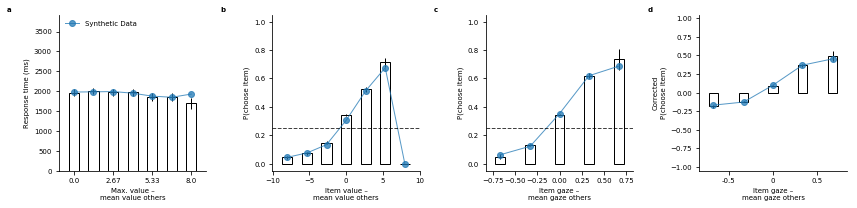

In [5]:
gb.plots.plot_aggregate(data, line_data=[synthetic], line_labels=['Synthetic Data']);

In [6]:
glam_rec = gb.GLAM(data=synthetic)
glam_rec.make_model(kind='individual')
glam_rec.fit(method='MCMC', draws=5000, tune=5000, chains=4)

Generating single subject models for 50 subjects...


/Users/felixmolter/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Fitting 50 model(s) using MCMC...
  Fitting model 1 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1391.09draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 2 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1399.12draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 3 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1395.69draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 4 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1392.59draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 5 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.83draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 6 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1391.66draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 7 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.17draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 8 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1387.27draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 9 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.47draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 10 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.93draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 11 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1373.22draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 12 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1386.81draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 13 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1388.71draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 14 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1375.44draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 15 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 16 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.95draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 17 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1379.13draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 18 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.44draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 19 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.02draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 20 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1201.24draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 21 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.78draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 22 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1367.50draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 23 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.74draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 24 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.54draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 25 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1385.23draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 26 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1379.03draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 27 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.87draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 28 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.88draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 29 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1379.20draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 30 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.20draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 31 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1387.42draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 32 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.42draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 33 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.65draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 34 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1380.07draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 35 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1381.60draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 36 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1378.30draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 37 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1383.20draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 38 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1368.49draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 39 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1378.51draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 40 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1379.51draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 41 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1377.54draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 42 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1382.73draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 43 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1377.08draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 44 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1371.65draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 45 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1373.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 46 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:28<00:00, 1379.69draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 47 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1367.69draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 48 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1376.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 49 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1371.56draws/s]
The number of effective samples is smaller than 10% for some parameters.


  Fitting model 50 of 50...


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [s]
>Metropolis: [gamma]
>Metropolis: [v]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:29<00:00, 1376.09draws/s]
The number of effective samples is smaller than 10% for some parameters.


/!\ Automatically setting parameter precision...


Finally, the recovered and generating parameters can be compared. If the recovered parameters do not align with the generating parameters, this indicates that model parameters cannot be identified given this specific data set. In this case, parameter estimates should not be interpreted, as the true parameters might be different from the obtained estimates.
If, on the other hand, generating and recovered parameters do align to a satisfying degree, the parameters have been recovered successfully. This increases confidence in that the parameters obtained from the empirical data are valid and can be interpreted.

xxx todo, this plot needs to be made nice, ideally using existing plot_node and plot_individual_node_comparison functions

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def plot_recovery(model, true_parameters, parameters=['v', 'gamma' , 's', 'tau'],
                  relative=True,
                  limits=dict(v=(0, 0.00015),
                              gamma=(-1, 1),
                              s=(0, 0.015),
                              tau=(0, 3)),
                  figsize=(12, 4),
                  histogram_color='lightblue',
                  successcolor='green',
                  failcolor='red',
                  markersize=20,
                  linewidth=2):
    
    n_individuals = len(true_parameters[parameters[0]])
    n_parameters = len(parameters)
    
    if model.type == 'hierarchical':
        n_rows = 2
        group_level = True
        i = 1
        summary = pm.summary(model.trace[0])
    elif model.type == 'individual':
        n_rows = 1
        group_level = False
        i = 0
        summaries = [pm.summary(model.trace[s])
                     for s in range(n_individuals)]


    fig, axs = plt.subplots(n_rows, n_parameters, sharex='col', figsize=figsize)
    


    
    df = pd.DataFrame(dict(subject=np.arange(n_individuals)))
    
    for p, parameter in enumerate(parameters):
        
        df[parameter + '_gen'] = true_parameters[parameter]
        if model.type == 'hierarchical':
            df[parameter + '_rec'] = [summary.loc[parameter + '__{}_0'.format(i), 'mean']
                                      for i in range(n_individuals)]
            df[parameter + '_rec_hpd_lower'] = [summary.loc[parameter + '__{}_0'.format(i), 'hpd_2.5']
                                                for i in range(n_individuals)]
            df[parameter + '_rec_hpd_upper'] = [summary.loc[parameter + '__{}_0'.format(i), 'hpd_97.5']
                                                for i in range(n_individuals)]
        elif model.type == 'individual':
            df[parameter + '_rec'] = [summaries[i].loc[parameter + '__0_0', 'mean']
                                      for i in range(n_individuals)]
            df[parameter + '_rec_hpd_lower'] = [summaries[i].loc[parameter + '__0_0', 'hpd_2.5']
                                                for i in range(n_individuals)]
            df[parameter + '_rec_hpd_upper'] = [summaries[i].loc[parameter + '__0_0', 'hpd_97.5']
                                                for i in range(n_individuals)]
            
        
        success = ((df[parameter + '_gen'] > df[parameter + '_rec_hpd_lower']) &
                   (df[parameter + '_gen'] < df[parameter + '_rec_hpd_upper'])).values.astype(int)
        color = np.array([failcolor, successcolor])[success]

        # Generating values
        if model.type == 'hierarchical':
            ax = axs[i, p]
        elif model.type == 'individual':
            ax = axs[p]

        if relative:
            delta_shift = df[parameter + '_gen']
        else:
            delta_shift = 0

        if relative:
            ax.axvline(0,
                       color='black',
                       zorder=-1,
                       linewidth=1,
                       alpha=0.7)
        else:
            ax.scatter((df[parameter + '_gen'] - delta_shift),
                           np.arange(n_individuals),
                           marker='.',
                           color='black',
                           s=markersize,
                           zorder=2,
                           alpha=0.5)
        # Recovered values
        #  Mode
        ax.scatter((df[parameter + '_rec'] - delta_shift),
                       np.arange(n_individuals),
                       marker='o',
                       facecolor='white',
                       linewidth=linewidth,
                       color=color,
                       s=markersize,
                       zorder=1)
        #  HPD
        ax.hlines(y=np.arange(n_individuals),
                      xmin=(df[parameter + '_rec_hpd_lower'] - delta_shift),
                      xmax=(df[parameter + '_rec_hpd_upper'] - delta_shift),
                      linewidth=linewidth,
                      color=color,
                      zorder=0)
        if relative:
            ax.set_xlabel(r'$\Delta$ ' + parameter)
        else:
            ax.set_xlabel(parameter)
        ax.set_xlim(limits[parameter])
        ax.set_ylabel('Subject')

    if group_level:
        for p, parameter in enumerate(parameters):
            plot_posterior(model.trace[0],
                              var_names=[parameter + '_mu'],
                              ref_val=true_parameters[parameter].mean(),
                              ax=axs[0, p])
    fig.tight_layout()
    return fig, axs

In [9]:
from pymc3 import hpd

def plot_posterior(trace, varname, ref_val=None, alpha=0.05, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.hist(trace.get_values(varname), alpha=0.5)
    if ref_val is not None:
        ax.axvline(ref_val, color='black')
        ax.text(0.5, 0.9,
                '{}% < {} < {}%'.format(100 * np.mean(trace.get_values(varname) < ref_val),
                                        ref_val,
                                        100 * np.mean(trace.get_values(varname) > ref_val)),
                transform=ax.transAxes)
    ax.axvspan(*hpd(trace.get_values(varname), alpha), color='lightgray', zorder=-1, alpha=0.4)
    
    return ax

In [10]:
true_parameters = {parameter: glam.estimates[parameter].values
                   for parameter in ['v', 'gamma', 's', 'tau']}

In [11]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

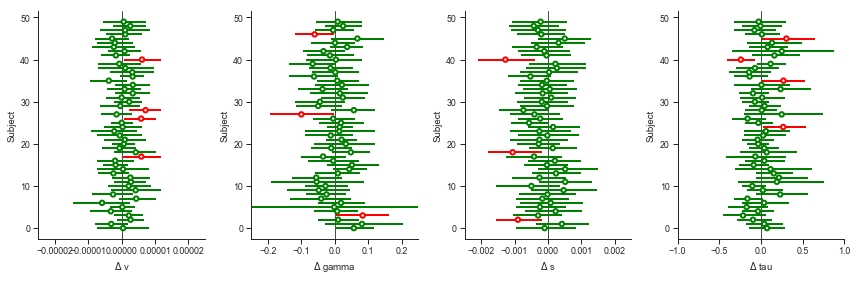

In [33]:
plot_recovery(glam_rec, true_parameters,
              limits=dict(v=(-0.000025, 0.000025),
                          gamma=(-0.25, 0.25),
                          s=(-0.0025, 0.0025),
                          tau=(-1, 1)));
sns.despine()

In the example, all parameters could be recovered to a satisfying degree. Maximum a posteriori parameter estimates were close to the true generating parameters, on the level of the group (Fig. X, top row) and individual (Fig. X, bottom row).


# Conclusion

In this example, we demonstrated how to perform a basic parameter recovery for a given dataset. When successful, this increases confidence that the parameters can be identified with the given data set and that the obtained parameter estimates are the true generating parameters.
